# Python Tweepy Crawler

In [1]:
#SA2, about kfc restaurant
import json
sa2_feature = open('C:/Users/LC/Desktop/Fast food research/SA2 analysis/aus_SA2.json','r')
# sa2_feature = open('C:/Users/LC/Desktop/Fast food research/SA2 analysis/partmelb.json','r')
sa2_json = json.loads(sa2_feature.read())

sa2_name = []
sa2_code = []
sa2_polygon = []
for i in range(len(sa2_json['features'])):
    sa2_name.append(sa2_json['features'][i]['properties']['feature_name'])
    if '206041122' in sa2_json['features'][i]['properties']['feature_code']:
        melbpolygon = sa2_json['features'][i]['geometry']['coordinates'][0][0]
    sa2_code.append(sa2_json['features'][i]['properties']['feature_code'])
    sa2_polygon.append(sa2_json['features'][i]['geometry']['coordinates'][0][0])

def isInsidePolygon(pt, poly):
    c = False
    i = -1
    l = len(poly)
    j = l - 1
    while i < l-1:
        i += 1
        #print i,poly[i], j,poly[j]
        if ((poly[i][0] <= pt[0] and pt[0] < poly[j][0]) or (poly[j][0] <= pt[0] and pt[0] < poly[i][0])):
            if (pt[1] < (poly[j][1] - poly[i][1]) * (pt[0] - poly[i][0]) / (poly[j][0] - poly[i][0]) + poly[i][1]):
                c = not c
        j = i
    return c

def calbest(latlongroup,point):
    for numpoly in range(len(latlongroup)):
        if isInsidePolygon(point,latlongroup[numpoly]):
            #print isInsidePolygon(point,latlongroup[numpoly]),lgacode[numpoly],lganame[numpoly]
            return [sa2_code[numpoly],sa2_name[numpoly]]

In [2]:
# import csv
# fileHeader = ["lat","lon"]
# csvFile = open("C:/Users/LC/Desktop/Fast food research/neural/melbpolygon.csv", "wb")
# writer = csv.writer(csvFile)

# writer.writerow(fileHeader)
# for a in melbpolygon:
#     writer.writerow(a)
# csvFile.close()

In [3]:
from sklearn.feature_extraction import DictVectorizer

def get_BOW(text):
    BOW = {}
    for word in text:
        BOW[word] = BOW.get(word,0) + 1
    return BOW

In [4]:
import csv
f = open("C:/Users/LC/Desktop/Fast food research/mel_ff.csv")
f_csv = csv.reader(f)
ta_info = []
latloninfo = []
for info in f_csv:
    latlon = []
    new_info = []
    new_info.extend(info)
    if info[2] == 'lon':
        continue
    else:
        #melpart2 
#         latlon.append(float(info[1]))
#         latlon.append(float(info[2]))
        #offical data
        latlon.append(float(info[2]))
        latlon.append(float(info[1]))
    if calbest(sa2_polygon,latlon) == None:
        new_info.extend([' ',' '])
    else:
        new_info.extend(calbest(sa2_polygon,latlon))
        latloninfo.append(calbest(sa2_polygon,latlon))
    ta_info.append(new_info)
print len(ta_info)

762


In [5]:
ffsa2_name = []
for a in latloninfo:
    ffsa2_name.append(a[1])
    
latlonbow = get_BOW(ffsa2_name)
kfcrl = sorted(latlonbow.items(), lambda x, y: cmp(x[1], y[1]), reverse=True)
print len(kfcrl)

213


In [7]:
# print kfcrl

In [8]:
# tweetsa2name = [u'Melbourne', u'Epping', u'Narre Warren', u'Cheltenham - Highett (East)', u'Mill Park - North', u'Dandenong'
#            , u'Preston', u'Taylors Lakes', u'Point Nepean', u'Malvern East', u'Beaconsfield - Officer', u'Deer Park - Derrimut'
#            , u'Richmond (Vic.)', u'Cranbourne', u'Wantirna South', u'Frankston', u'Craigieburn - Mickleham', u'Caroline Springs'
#            , u'Keysborough', u'Hoppers Crossing - South', u'Broadmeadows', u'Mornington', u'Ringwood', u'Carrum Downs'
#            , u'Knoxfield - Scoresby', u'Clayton', u'Werribee - South', u'Bayswater North', u'Doncaster East', u'Altona North'
#            , u'Maribyrnong', u'Springvale', u'Lynbrook - Lyndhurst', u'Melton', u'Sunshine', u'Melbourne Airport', u'Sunbury - South'
#            , u'Docklands', u'Rosebud - McCrae', u'Ferntree Gully', u'Prahran - Windsor', u'Berwick - South', u'Oakleigh - Huntingdale'
#            , u'Flemington', u'Southbank', u'Hoppers Crossing - North', u'Point Cook', u'Melton West', u'Campbellfield - Coolaroo'
#            , u'South Yarra - East', u'Footscray', u'Roxburgh Park - Somerton', u'Thomastown', u'St Kilda', u'Glen Waverley - West'
#            , u'Essendon - Aberfeldie', u'Tarneit', u'Lilydale - Coldstream', u'Forest Hill', u'Keilor', u'Mount Waverley - South'
#            , u'Greensborough', u'Hawthorn', u'Sunshine West', u'Hastings - Somers', u'Langwarrin', u'Ormond - Glen Huntly'
#            , u'Pakenham - North', u'Wyndham Vale', u'Moorabbin - Heatherton', u'Bundoora - West', u'Frankston South', u'Endeavour Hills'
#            , u'Doncaster', u'Heidelberg - Rosanna', u'Kingsbury', u'Somerville', u'Airport West', u'Laverton', u'Eltham', u'Parkville'
#            , u'Burwood East', u'Frankston North', u'Mordialloc - Parkdale', u'Elsternwick', u'Ashburton (Vic.)', u'Rockbank - Mount Cottrell'
#            , u'Reservoir - West', u'Clayton South', u'Noble Park', u'Yarraville', u'Hampton Park - Lynbrook', u'Kew', u'Burwood'
#            , u'Brunswick', u'Nunawading', u'Blackburn', u'Mentone', u'Balwyn', u'Chirnside Park', u'Essendon Airport', u'South Melbourne'
#            , u'Braeside', u'Wantirna', u'Mulgrave', u'Hampton', u'Box Hill', u'Croydon', u'Coburg', u'South Yarra - West', u'Altona Meadows'
#            , u'Chelsea Heights', u'Carrum - Patterson Lakes', u'Collingwood', u'Noble Park North', u'Wattle Glen - Diamond Creek'
#            , u'Carlton', u'Vermont South', u'Pakenham - South', u'Montmorency - Briar Hill', u'Hughesdale', u'Thornbury', u'Armadale'
#            , u'Carnegie', u'Brighton (Vic.)', u'Camberwell', u'Heidelberg West', u'Cranbourne West', u'Taylors Hill', u'Sydenham'
#            , u'Brunswick East', u'Truganina', u'Dandenong North', u'Williamstown', u'Keilor Downs', u'Berwick - North'
#            , u'Port Melbourne Industrial', u'Port Melbourne', u'Wheelers Hill', u'Fawkner', u'Rowville - Central', u'South Morang'
#            , u'St Albans - South', u'Keilor East', u'Skye - Sandhurst', u'Balwyn North', u'Bentleigh East', u'Ringwood East'
#            , u'Bundoora - North', u'Delahey', u'Glen Waverley - East', u'Bentleigh - McKinnon', u'Mooroolbark', u'Templestowe Lower'
#            , u'Alphington - Fairfield', u'Gladstone Park - Westmeadows', u'Mitcham (Vic.)', u'North Melbourne', u'Boronia - The Basin'
#            , u'Lysterfield', u'Hallam', u'Cranbourne East', u'Bulleen', u'Mount Evelyn', u'St Albans - North', u'Bundoora - East'
#            , u'Glenroy - Hadfield', u'Montrose', u'Whittlesea', u'Pascoe Vale South', u'Fitzroy North', u'Abbotsford', u'Viewbank - Yallambie'
#            , u'Ashwood - Chadstone', u'Glen Iris - East', u'St Kilda East', u'Ringwood North', u'Caulfield - South', u'Pascoe Vale'
#            , u'Caulfield - North', u'Bayswater', u'Seabrook', u'Seaford (Vic.)', u'Cranbourne North', u'Croydon Hills - Warranwood'
#            , u'Moonee Ponds', u'Koo Wee Rup', u'Watsonia', u'Fitzroy', u'Niddrie - Essendon West', u'Doveton', u'Templestowe'
#            , u'Malvern - Glen Iris', u'Tullamarine', u'Narre Warren South', u'Surrey Hills (West) - Canterbury', u'Hawthorn East'
#            , u'Belgrave - Selby', u'Dingley Village', u'Upwey - Tecoma', u'Moorabbin Airport', u'Coburg North', u'Braybrook'
#            , u'Box Hill North', u'Ascot Vale', u'Brighton East', u'Greenvale - Bulla', u'Dromana', u'Sunshine North', u'Ivanhoe'
#            , u'Wandin - Seville', u'Newport', u'Monbulk - Silvan']

In [9]:
# sa2_name = []
# sa2_code = []
# sa2_polygon = []
# for i in range(len(sa2_json['features'])):
#     if sa2_json['features'][i]['properties']['feature_name'] in tweetsa2name:
#         sa2_name.append(sa2_json['features'][i]['properties']['feature_name'])
#         sa2_code.append(sa2_json['features'][i]['properties']['feature_code'])
#         sa2_polygon.append(sa2_json['features'][i]['geometry']['coordinates'][0][0])

In [23]:
import json
import codecs
containfatkword = open('E:/labelledTwitter.json','r')
alltext = []
sa2_list = []
allcor = []

for line in containfatkword:
    coorpoint = []
    new = json.loads(line, encoding='utf8')
    if len(new['label']) == 12:
        alltext.append(new['text'])
        allcor.append(new['coordinate'])
#     coorpoint.append(float(line['geo']['coordinates'][1]))
#     coorpoint.append(float(line['geo']['coordinates'][0]))
        coorpoint.append(float(new['coordinate'][1]))
        coorpoint.append(float(new['coordinate'][0]))
        sa2_list.append(calbest(sa2_polygon,coorpoint))
containfatkword.close()
print len(sa2_list)
print len(alltext)

39370
39370


In [26]:
import csv
fileHeader = ["lat","lon"]
csvFile = open("C:/Users/LC/Desktop/Fast food research/neural/tweetlocation.csv", "wb")
writer = csv.writer(csvFile)

writer.writerow(fileHeader)
for a in allcor:
    writer.writerow(a)
csvFile.close()

In [24]:
print allcor[1]

[-34.92320015, 138.60997497]


In [15]:
sa2_namelist = []
for a in sa2_list:
    if a != None:
        sa2_namelist.append(a[1])
        
kfctw =sorted(get_BOW(sa2_namelist).items(), lambda x, y: cmp(x[1], y[1]), reverse=True)
print len(kfctw)

265


In [17]:
# print kfctw

In [18]:
kfclt = []
for a in kfcrl:
    new = []
    new.extend(a)
    for b in kfctw:
        if a[0] == b[0]:
            new.append(b[1])
    kfclt.append(new)

In [19]:
print len(kfclt)

213


In [56]:
kfclinear = []
num_kfc = []
num_kfcrest = []
num_tweet = []
loc_name = []
for a in kfclt:
    if len(a) == 3:
        kfclinear.append(a)
        loc_name.append(a[0])
        num_kfc.append([a[1]])
        num_kfcrest.append(a[1])
        num_tweet.append(a[2])
print len(kfclinear)

4


In [57]:
#linear regression
import matplotlib.pyplot as plt  
import numpy as np   
from sklearn import datasets, linear_model  

In [58]:
#function to show the linear model
def show_linear_model(x,y):
    #Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(x,y)
    plt.scatter(x,y,color = 'blue')
    plt.plot(x,regr.predict(x),color = 'red',linewidth = 4)
    plt.xticks((x))
    plt.yticks((y))
    plt.show()

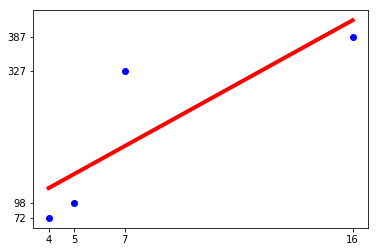

In [59]:
show_linear_model(num_kfc,num_tweet)

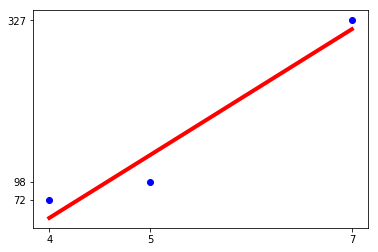

In [60]:
show_linear_model(num_kfc[1:],num_tweet[1:])

In [61]:
def pearsonSimilar(inA,inB):  
    if len(inA)<3:  
        return 1.0  
#     return 0.5+0.5*np.corrcoef(inA,inB,rowvar=0)[0][1]  
    return np.corrcoef(inA,inB,rowvar=0)[0][1] 

In [62]:
print pearsonSimilar(num_kfcrest,num_tweet)
print pearsonSimilar(num_kfcrest[1:],num_tweet[1:])

0.835549980081
0.971172242629


In [63]:
print loc_name
print num_kfcrest
print num_tweet

[u'melbpart3', u'melbpart4', u'melbpart1', u'melbpart2']
[16, 7, 5, 4]
[387, 327, 98, 72]


In [64]:
import csv
f = open("C:/Users/LC/Desktop/Fast food research/SA2 analysis/aurinsa2.csv")
fat_csv = csv.reader(f)

fatdata = []
for info in fat_csv:
    if info[4] == 'area_name':
        print info
        continue
    else:
        if info[4] in loc_name:
            fatdata.append(info)
f.close()
print fatdata

[]


In [ ]:
analydata = []
for i in range(len(loc_name)):
    new = []
    for b in fatdata:
        if loc_name[i] == b[4]:
            new.append(b[4])
            new.append(b[3])
            new.append(b[1])
            new.append(b[7])
    for a in kfclt:
        if loc_name[i] == a[0]:
            new.append(a[1])
            new.append(a[2])
    analydata.append(new)
print analydata

In [27]:
import csv
fileHeader = ["sa2_name","sa2_code","overweight","obesity","num_fastfood","num_tweet"]
csvFile = open("C:/Users/LC/Desktop/Fast food research/neural/partmelinfo.csv", "wb")
writer = csv.writer(csvFile)

writer.writerow(fileHeader)
for a in analydata:
    writer.writerow(a)
csvFile.close()

In [65]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [66]:
import seaborn as sns
sns.set(color_codes=True)

In [67]:
np.random.seed(sum(map(ord, "regression")))

In [69]:
tips = sns.load_dataset("partmelbonlydata")

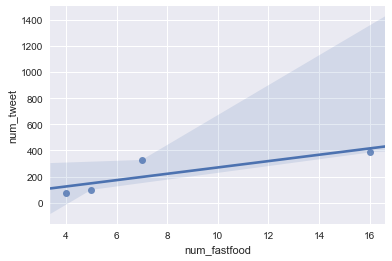

In [71]:
sns.regplot(x="num_fastfood", y="num_tweet", data=tips);

In [7]:
sns.lmplot(x="total_bill", y="tip", data=tips);

In [10]:
x = np.random.normal(size=100)
sns.distplot(x);

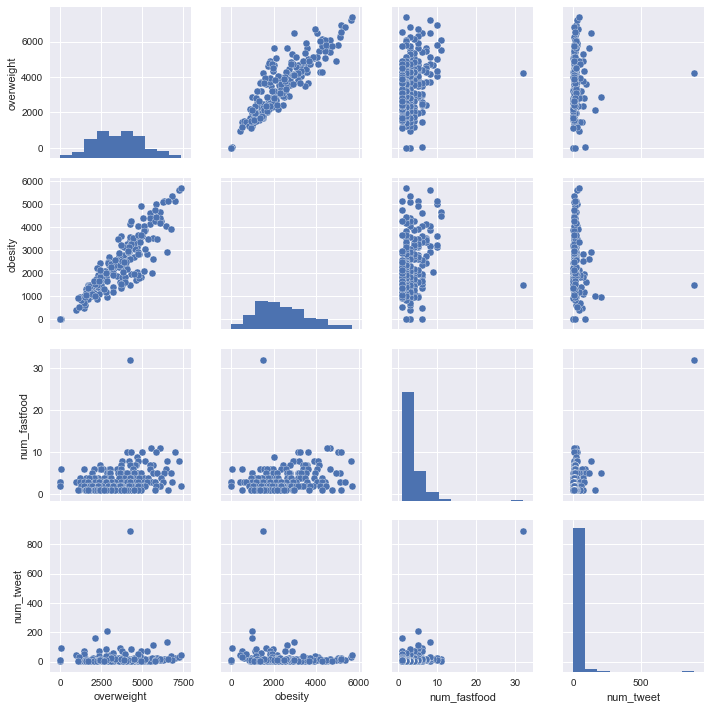

In [37]:
iris = sns.load_dataset("sa2onlydata")  
sns.pairplot(iris)

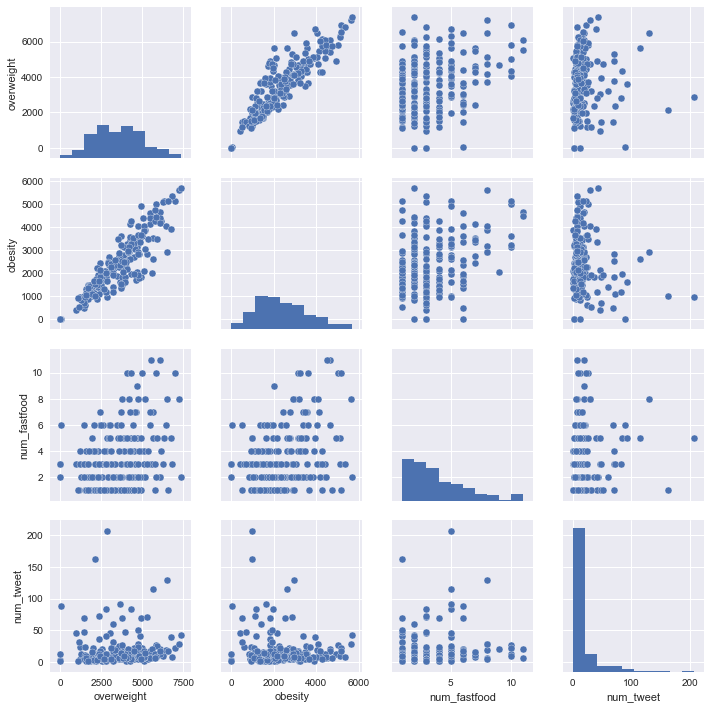

In [39]:
iris = sns.load_dataset("sa2nom")  
sns.pairplot(iris)